In [117]:
from IPython import get_ipython
ipython = get_ipython()
ipython.magic('load_ext autoreload')
ipython.magic('autoreload 2')

import os
import sys
import glob
import shutil
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../../..')
from biodl.bio_utils import parallel_tasks_run_def
from biodl.deephd.dhd_data import _load_idx
import logging
logging.basicConfig(level=logging.INFO)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
def check_seq(row: pd.Series) -> tuple:
    data_coords = pkl.load(open(row['path_coords_abs'], 'rb'))
    data_sasa = pd.read_csv(row['path_sasa_abs'])
    seq_ca0 = data_coords['res'][0]
    seq_ca1 = data_coords['res'][1]
    seq_sasa = np.array(data_sasa['acid'].to_list())
    is_ok_cacb = np.mean(seq_ca0 == seq_ca1)
    if len(seq_ca0) != len(seq_sasa):
        is_ok_sasa = False
    else:
        is_ok_sasa = np.mean(seq_ca0 == seq_sasa)
    return (is_ok_cacb, is_ok_sasa, row['path_pdb_abs'])


In [125]:
rad = 3
path_idx = '/mnt/data1T/data/annaha/homod/idx-with-errors.txt'
path_idx_ok = '/mnt/data1T/data/annaha/homod/idx.txt'
# path_idx = path_idx_ok
data_idx = _load_idx(path_idx)
data_idx['path_sasa_abs'] = [x.format(rad) for x in data_idx['path_sasa_abs']]

In [126]:
task_data = [{'row': x} for _, x in data_idx.iterrows()]


In [127]:
ret = parallel_tasks_run_def(check_seq, task_data, num_workers=8)

INFO:root::: start (unnamed-task) #data/#threads = 17555/8, use-process(True)
INFO:root:	[0/17555] (l1) (unnamed-task)
INFO:root:	[1756/17555] (l1) (unnamed-task)
INFO:root:	[3512/17555] (l1) (unnamed-task)
INFO:root:	[5268/17555] (l1) (unnamed-task)
INFO:root:	[7024/17555] (l1) (unnamed-task)
INFO:root:	[8780/17555] (l1) (unnamed-task)
INFO:root:	[10536/17555] (l1) (unnamed-task)
INFO:root:	[12292/17555] (l1) (unnamed-task)
INFO:root:	[14048/17555] (l1) (unnamed-task)
INFO:root:	[15804/17555] (l1) (unnamed-task)
INFO:root:		... done, dt ~ 10.72 (s), speed=1638.24 (samples/s) [unnamed-task]


In [128]:
q_diff = np.array([x[:2] for x in ret])
q_pdb = np.array([x[-1] for x in ret])

Text(0.5, 1.0, '#errors = 1044')

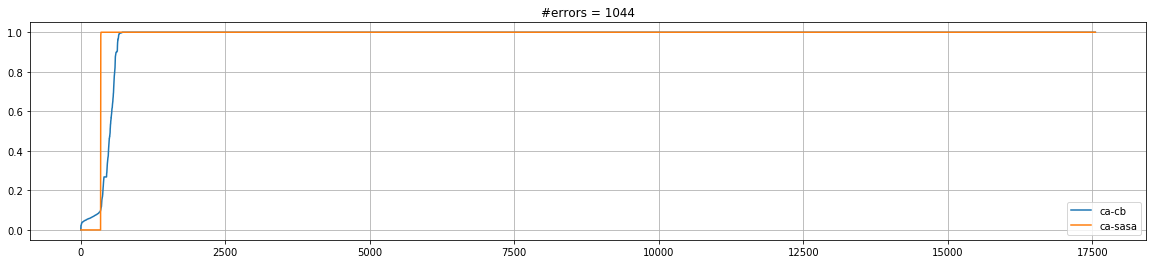

In [129]:
plt.figure(figsize=(20, 4))
plt.plot(sorted(q_diff[:, 0]), label='ca-cb')
plt.plot(sorted(q_diff[:, 1]), label='ca-sasa')
plt.grid()
plt.legend()
plt.title('#errors = {}'.format(np.sum(q_diff.mean(axis=-1) < 1)))

In [116]:
data_idx_clean = pd.read_csv(path_idx)
data_idx_clean = data_idx_clean.iloc[q_diff.mean(axis=-1) == 1]
data_idx_clean.to_csv(path_idx_ok, index=None)

In [101]:
idx_strages_1 = (q_diff[:, 0] == 1) & (q_diff[:, 1] < 1)
dir_out = '/mnt/data1T/data/annaha/homod/00_debug_01'
q_pdb_bad1 = q_pdb[idx_strages_1]

In [72]:
for x in q_pdb_bad1:
    lst_ = glob.glob(os.path.splitext(x)[0] + '*')
    for z in lst_:
        shutil.copy2(z, dir_out)

In [74]:
path_pkl = '/mnt/data1T/data/annaha/homod/00_debug_01/6qjx_raw_dumpl_cacb.pkl'
path_sasa = '/mnt/data1T/data/annaha/homod/00_debug_01/6qjx_raw_dumpl_model_0_sasa_r3.txt'
data_pkl = pkl.load(open(path_pkl, 'rb'))
data_sasa = pd.read_csv(path_sasa)

In [88]:
data_pkl['res'][0].shape

(195,)

In [94]:
np.array(data_sasa['acid'].to_list())

array(['SER', 'ARG', 'LEU', 'ASN', 'ARG', 'GLU', 'SER', 'VAL', 'ILE',
       'ASP', 'ALA', 'ALA', 'LEU', 'GLU', 'LEU', 'LEU', 'ASN', 'GLU',
       'THR', 'GLY', 'ILE', 'ASP', 'GLY', 'LEU', 'THR', 'THR', 'ARG',
       'LYS', 'LEU', 'ALA', 'GLN', 'LYS', 'LEU', 'GLY', 'ILE', 'GLU',
       'GLN', 'PRO', 'THR', 'LEU', 'TYR', 'TRP', 'HIS', 'VAL', 'LYS',
       'ASN', 'LYS', 'ARG', 'ALA', 'LEU', 'LEU', 'ASP', 'ALA', 'LEU',
       'ALA', 'VAL', 'GLU', 'ILE', 'LEU', 'ALA', 'ARG', 'HIS', 'HIS',
       'ASP', 'TYR', 'SER', 'LEU', 'PRO', 'ALA', 'ALA', 'GLY', 'GLU',
       'SER', 'TRP', 'GLN', 'SER', 'PHE', 'LEU', 'ARG', 'ASN', 'ASN',
       'ALA', 'MET', 'SER', 'PHE', 'ARG', 'ARG', 'ALA', 'LEU', 'LEU',
       'ARG', 'TYR', 'ARG', 'ASP', 'GLY', 'ALA', 'LYS', 'VAL', 'HIS',
       'LEU', 'GLY', 'ALA', 'ARG', 'PRO', 'ASP', 'GLU', 'LYS', 'GLN',
       'TYR', 'ASP', 'THR', 'VAL', 'GLU', 'THR', 'GLN', 'LEU', 'ARG',
       'PHE', 'MET', 'THR', 'GLU', 'ASN', 'GLY', 'PHE', 'SER', 'LEU',
       'ARG', 'ASP',

In [77]:
data_pkl['res'][0]

array(['SER', 'ARG', 'LEU', 'ASN', 'ARG', 'GLU', 'SER', 'VAL', 'ILE',
       'ASP', 'ALA', 'ALA', 'LEU', 'GLU', 'LEU', 'LEU', 'ASN', 'GLU',
       'THR', 'GLY', 'ILE', 'ASP', 'GLY', 'LEU', 'THR', 'THR', 'ARG',
       'LYS', 'LEU', 'ALA', 'GLN', 'LYS', 'LEU', 'GLY', 'ILE', 'GLU',
       'GLN', 'PRO', 'THR', 'LEU', 'TYR', 'TRP', 'HIS', 'VAL', 'LYS',
       'ASN', 'LYS', 'ARG', 'ALA', 'LEU', 'LEU', 'ASP', 'ALA', 'LEU',
       'ALA', 'VAL', 'GLU', 'ILE', 'LEU', 'ALA', 'ARG', 'HIS', 'HIS',
       'ASP', 'TYR', 'SER', 'LEU', 'PRO', 'ALA', 'ALA', 'GLY', 'GLU',
       'SER', 'TRP', 'GLN', 'SER', 'PHE', 'LEU', 'ARG', 'ASN', 'ASN',
       'ALA', 'MET', 'SER', 'PHE', 'ARG', 'ARG', 'ALA', 'LEU', 'LEU',
       'ARG', 'TYR', 'ARG', 'ASP', 'GLY', 'ALA', 'LYS', 'VAL', 'HIS',
       'LEU', 'GLY', 'ALA', 'ARG', 'PRO', 'ASP', 'GLU', 'LYS', 'GLN',
       'TYR', 'ASP', 'THR', 'VAL', 'GLU', 'THR', 'GLN', 'LEU', 'ARG',
       'PHE', 'MET', 'THR', 'GLU', 'ASN', 'GLY', 'PHE', 'SER', 'LEU',
       'ARG', 'ASP',